In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Glucose'>

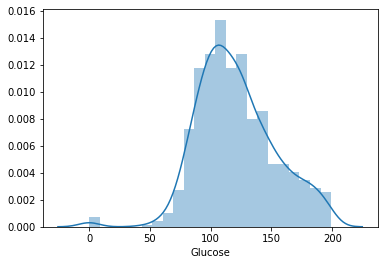

In [7]:
sns.distplot(df["Glucose"])

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Age'>

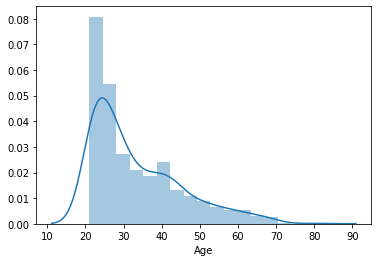

In [9]:
sns.distplot(df["Age"])

In [10]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
df.shape

(768, 9)

In [12]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [13]:
df["Pregnancies"].nunique()

17

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df["Pregnancies"] = df["Pregnancies"].astype("category")
df["Outcome"] = df["Outcome"].astype("category")

In [16]:
df["Age"] = df["Age"].apply(np.log1p)

In [17]:
df["Insulin"] = df["Insulin"].apply(np.log1p)

In [18]:
df["Glucose"] = df["Glucose"].apply(np.log1p)
df["BloodPressure"] = df["BloodPressure"].apply(np.log1p)
df["SkinThickness"] = df["SkinThickness"].apply(np.log1p)

In [19]:
df_num = df.select_dtypes(include =["float64", "int64"])
df_cat = df.select_dtypes(exclude =["float64", "int64"])

In [20]:
df_cat = df_cat.drop("Outcome",axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
mn = MinMaxScaler()
df_num_sc = mn.fit_transform(df_num)

In [23]:
df_num_df = pd.DataFrame(df_num_sc, index = df_num.index, columns=df_num.columns)

In [24]:
df_cat_dum = pd.get_dummies(df_cat)

In [25]:
df_final = pd.concat([df_num_df, df_cat_dum],axis=1)

In [26]:
df_final.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.944441,0.891583,0.778151,0.000000,0.500745,0.234415,0.639050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.840710,0.873760,0.738561,0.000000,0.396423,0.116567,0.284791,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.984263,0.867462,0.000000,0.000000,0.347243,0.253629,0.308180,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.849290,0.873760,0.690106,0.675479,0.418778,0.038002,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.929966,0.771702,0.778151,0.760921,0.642325,0.943638,0.330870,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x = df_final
y = df["Outcome"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state = 10)

## ADAboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [32]:
pred = ad.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy_score(y_test, pred)

0.7012987012987013

In [35]:
accuracy_score(y_train, ad.predict(x_train))

0.8422575976845152

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 100)

In [37]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [38]:
pred = ad.predict(x_test)

In [39]:
accuracy_score(y_test, pred)

0.7077922077922078

In [40]:
accuracy_score(y_train, ad.predict(x_train))

0.8371335504885994

In [41]:
ad = AdaBoostClassifier(n_estimators=500)
ad.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [42]:
pred = ad.predict(x_test)

In [43]:
accuracy_score(y_test, pred)

0.6818181818181818

In [44]:
accuracy_score(y_train, ad.predict(x_train))

0.9381107491856677

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
ad_cv = cross_validate(ad, x,y, cv = 10, return_train_score=True)

In [47]:
ad_test = np.average(ad_cv["test_score"])

In [48]:
ad_train = np.average(ad_cv["train_score"])

In [49]:
ad_test

0.7344326725905673

In [50]:
ad_train

0.9134840601289911

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pred = rf.predict(x_test)

In [54]:
accuracy_score(y_test, pred)

0.6948051948051948

In [55]:
accuracy_score(y_train, rf.predict(x_train))

1.0

In [56]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
pred = rf.predict(x_test)

In [58]:
accuracy_score(y_test, pred)

0.7207792207792207

In [59]:
accuracy_score(y_train, rf.predict(x_train))

1.0

In [60]:
rf_cv = cross_validate(rf, x,y, cv = 10, return_train_score=True)

In [61]:
rf_test = np.average(rf_cv["test_score"])

In [62]:
rf_train = np.average(rf_cv["train_score"])

In [63]:
rf_test

0.7656015037593985

In [64]:
rf_train

1.0

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
pred= lr.predict(x_test)

In [68]:
accuracy_score(y_test, pred)

0.6623376623376623

In [69]:
accuracy_score(y_train, lr.predict(x_train))

0.7328990228013029

In [75]:
lr = LogisticRegression(penalty='l2', C=3.0)
lr.fit(x_train, y_train)

LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
pred= lr.predict(x_test)

In [77]:
accuracy_score(y_test, pred)

0.6818181818181818

In [78]:
accuracy_score(y_train, lr.predict(x_train))

0.757328990228013

In [79]:
lr_cv = cross_validate(lr, x,y, cv = 10, return_train_score=True)

In [80]:
lr_test = np.average(lr_cv["test_score"])

In [81]:
lr_train = np.average(lr_cv["train_score"])

In [82]:
lr_test

0.7278537252221463

In [83]:
lr_train

0.7446469052976753

In [84]:
confusion_matrix(y_test, pred)

array([[81, 20],
       [29, 24]])

In [86]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       101
           1       0.55      0.45      0.49        53

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



## XGB

In [87]:
import xgboost as xgb

In [88]:
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [89]:
pred = xg.predict(x_test)

In [90]:
accuracy_score(y_test, pred)

0.7532467532467533

In [91]:
accuracy_score(y_train, xg.predict(x_train))

1.0

In [92]:
xg = xgb.XGBClassifier(n_estimators=1000)
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [93]:
pred = xg.predict(x_test)

In [94]:
accuracy_score(y_test, pred)

0.7272727272727273

In [95]:
accuracy_score(y_train, xg.predict(x_train))

1.0

In [96]:
xg_cv = cross_validate(xg, x,y, cv = 10, return_train_score=True)

In [97]:
xg_test = np.average(xg_cv["test_score"])

In [98]:
xg_train = np.average(xg_cv["train_score"])

In [99]:
xg_test

0.7331510594668489

In [100]:
xg_train

1.0

### Class Imbalance 

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [103]:
x_train_sm.shape

(798, 24)

In [104]:
y_train_sm.value_counts()

1    399
0    399
Name: Outcome, dtype: int64

In [106]:
ad = AdaBoostClassifier()
ad.fit(x_train_sm, y_train_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [107]:
pred  = ad.predict(x_test)

In [108]:
accuracy_score(y_test,pred)

0.6948051948051948

In [110]:
accuracy_score(y_train_sm,ad.predict(x_train_sm))

0.8483709273182958

In [115]:
lr = LogisticRegression(C=2.0)
lr.fit(x_train_sm, y_train_sm)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
pred  = lr.predict(x_test)

In [117]:
accuracy_score(y_test,pred)

0.6753246753246753

In [118]:
accuracy_score(y_train_sm,lr.predict(x_train_sm))

0.7493734335839599